# **Data loading and Training**

In [2]:
#Importing necessary libraries 
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.applications import resnet
from keras import models
from keras import layers
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import math
from keras.callbacks import ModelCheckpoint

In [3]:
# Load the ResNet50 model
resnet_model = resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [4]:
# checking the trainable status of the individual layers
for layer in resnet_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f2b98f67490> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f2c138b3b90> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2bf89b3d50> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f2bf89b3fd0> True
<keras.layers.core.activation.Activation object at 0x7f2b96464c10> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f2bf88cb750> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f2bf8665450> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2b941a9650> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f2b941afd50> True
<keras.layers.core.activation.Activation object at 0x7f2b941b8950> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2b941c8110> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f2b941c8f50> True
<keras.layers.core.activati

In [5]:
# Adding classifier on top of Convolution model
# create model 
model = models.Sequential()

In [6]:
# Add the resnet50 convolutional model
model.add(resnet_model)

# Adding new Layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 31,987,594
Trainable params: 31,934,474
Non-trainable params: 53,120
_________________________________________________________________


In [8]:
dataset_url = r'/kaggle/input/eurosat-rgb/2750'
batch_size = 32
img_height = 64
img_width = 64
validation_split=0.2
rescale=1.0/255
     

In [9]:
# Image Preprocessing and data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,             
        zoom_range=0.2,              
        horizontal_flip=True,
         validation_split=0.2)

In [10]:
train_set = train_datagen.flow_from_directory(batch_size=batch_size,
                                           directory=dataset_url,
                                           shuffle=True,
                                           target_size=(img_height, img_width),
                                           subset="training",
                                           class_mode='categorical')
     

Found 21600 images belonging to 10 classes.


In [11]:
#Normalizing the test set
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [12]:
test_set = test_datagen.flow_from_directory(batch_size=batch_size,
                                           directory=dataset_url,                                          
                                           shuffle=False,
                                           target_size=(img_height, img_width),
                                           subset="validation",
                                           class_mode='categorical')
     

Found 5400 images belonging to 10 classes.


In [13]:
# lets dettermine dataset characteristics
print('Training Data: ',train_set[0][0].shape)
print('Test Data: ',test_set[0][0].shape)

Training Data:  (32, 64, 64, 3)
Test Data:  (32, 64, 64, 3)


In [14]:
# now shape of a single image
print('Shape of single image:', train_set[0][0][0].shape)

Shape of single image: (64, 64, 3)


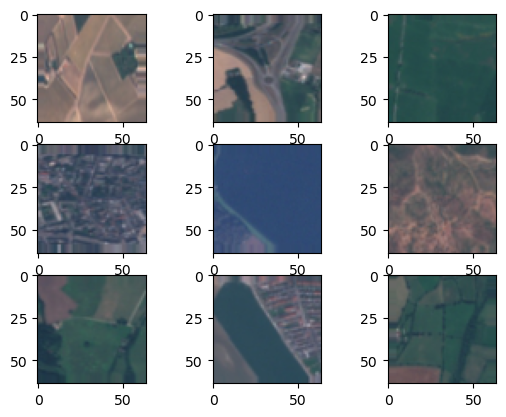

In [15]:
# create a grid of 3*3 images to visualize some of the imgaes in dataset
for i in range(0, 9):
    plt.subplot(330 + 1+ i)
    img = train_set[0][0][i]
    plt.imshow(img)
    
# show the plot
plt.show()

In [16]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
     

In [17]:
# ModelCheckpoint to save the weights for the best model
filepath="/kaggle/working//weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [18]:
# Train the model
history = model.fit(
          train_set, 
         steps_per_epoch=(train_set.samples/32),
          epochs=20,
          callbacks=callbacks_list,
          validation_data=test_set,
          validation_steps=(test_set.samples/32))

Epoch 1/20
675/675 [==============================] - ETA: 0s - loss: 0.5733 - acc: 0.8623
Epoch 1: val_acc improved from -inf to 0.09259, saving model to /kaggle/working/weights.best.hdf5
675/675 [==============================] - 160s 212ms/step - loss: 0.5733 - acc: 0.8623 - val_loss: 79.9143 - val_acc: 0.0926
Epoch 2/20
675/675 [==============================] - ETA: 0s - loss: 0.3422 - acc: 0.9320
Epoch 2: val_acc improved from 0.09259 to 0.83981, saving model to /kaggle/working/weights.best.hdf5
675/675 [==============================] - 66s 98ms/step - loss: 0.3422 - acc: 0.9320 - val_loss: 6.2722 - val_acc: 0.8398
Epoch 3/20
675/675 [==============================] - ETA: 0s - loss: 0.2911 - acc: 0.9441
Epoch 3: val_acc improved from 0.83981 to 0.96389, saving model to /kaggle/working/weights.best.hdf5
675/675 [==============================] - 67s 99ms/step - loss: 0.2911 - acc: 0.9441 - val_loss: 0.2680 - val_acc: 0.9639
Epoch 4/20
675/675 [==============================] - E

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


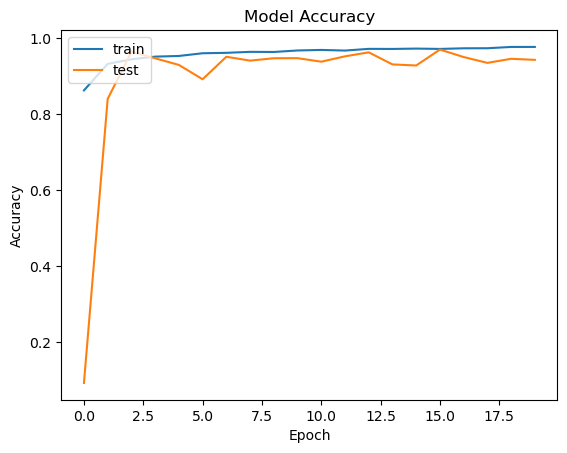

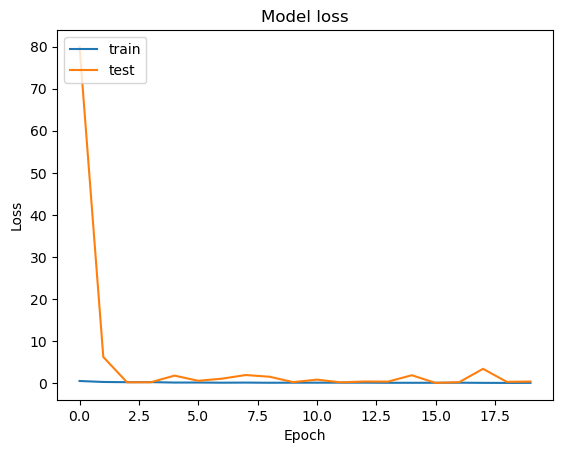

In [19]:
# Plotting the Loss and Classification Accuracy
model.metrics_names
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     